In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [8]:
dataset=pd.read_csv("Crop_recommendation.csv")
dataset.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN


In [10]:
dataset=dataset.drop(columns=["Unnamed: 8","Unnamed: 9"])

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [14]:
dataset.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [16]:
#Checking for null data and removing it by deleting rows containing null data
dataset.isnull().sum()

Nitrogen       0
phosphorus     0
potassium      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [18]:
dataset.dropna(inplace=True)

In [20]:
#Checking for duplicate data and removing it by deleting rows containing duplicate data and keeping first occurence
dataset.duplicated().sum()

0

In [22]:
dataset.drop_duplicates(keep="first",inplace=True)

In [24]:
def calculate_thi(temperature, humidity):
    return 0.8 * temperature + (humidity / 100) * (temperature - 14.4) + 46.4

# Adding THI as a new feature
dataset["THI"] = dataset.apply(lambda row: calculate_thi(row["temperature"], row["humidity"]), axis=1)
dataset.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,THI
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,68.417363
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,69.736298
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,71.886824
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,77.284902
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,67.180242


In [26]:
# Weights for Rainfall and Humidity
w1 = 0.7  # Weight for Rainfall
w2 = 0.3  # Weight for Humidity

# Function to calculate Water Availability Index
def calculate_wai(rainfall, humidity):
    return (rainfall * w1) + (humidity * w2)

# Adding WAI as a new feature
dataset["WAI"] = dataset.apply(lambda row: calculate_wai(row["rainfall"], row["humidity"]), axis=1)

In [28]:
#separating dataset into features and target
features=dataset.drop(["label"],axis="columns")
target=dataset["label"]
print(features)
print(target)

#scaling features
mms=MinMaxScaler()
nfeatures=mms.fit_transform(features.values)
print(nfeatures)

      Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall        THI         WAI  
0     202.935536  68.417363  166.655699  
1     226.65553

In [30]:
dataset.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,THI,WAI
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,75.141935,93.869093
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,8.393384,39.662872
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,48.839561,36.013567
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,70.959381,63.796874
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,75.318860,83.758842
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,79.990986,109.618283
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,108.598476,234.436163


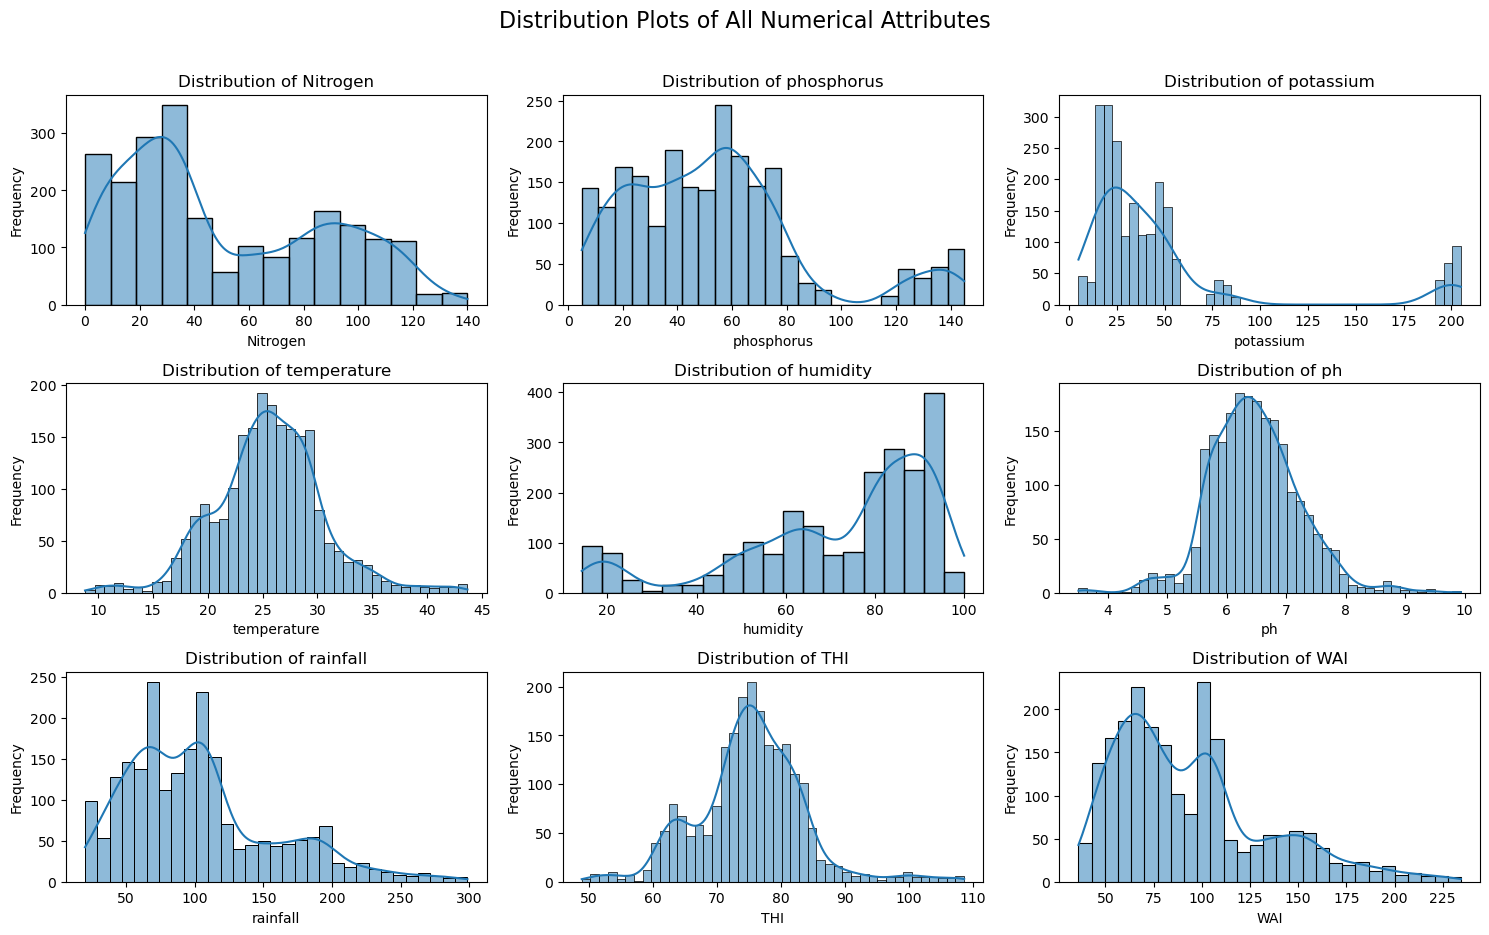

Current Notebook Path: C:\Users\ranaf\Downloads\H.AbdulRehman-MSDS-2024-S-11


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

numeric_data = dataset.select_dtypes(include='number')

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))
plt.suptitle('Distribution Plots of All Numerical Attributes', fontsize=16)

# Iterate through all numeric columns and create distribution plots
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(len(numeric_data.columns) // 3 + 1, 3, i)
    sns.histplot(numeric_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('distribution_plots.png', dpi=300)
plt.show()
notebook_path = os.getcwd()
print(f"Current Notebook Path: {notebook_path}")


Categorical Columns: Index(['label'], dtype='object')

Value Counts for label:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


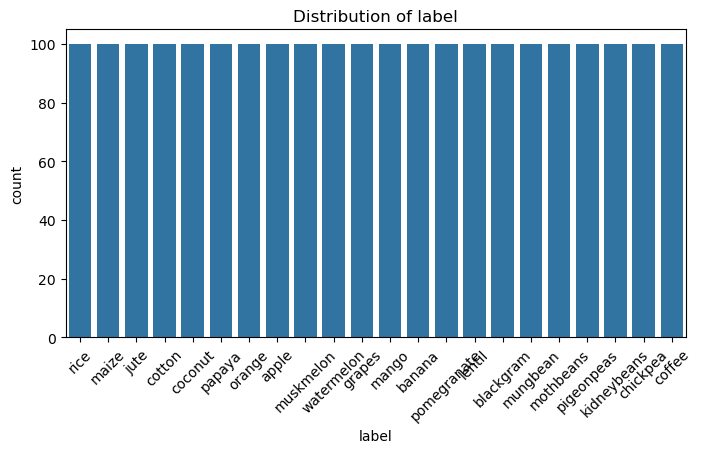

In [33]:
categorical_columns = dataset.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_columns)
for column in categorical_columns:
    print(f"\nValue Counts for {column}:")
    print(dataset[column].value_counts())

# Visualizing categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=column, order=dataset[column].value_counts().index)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

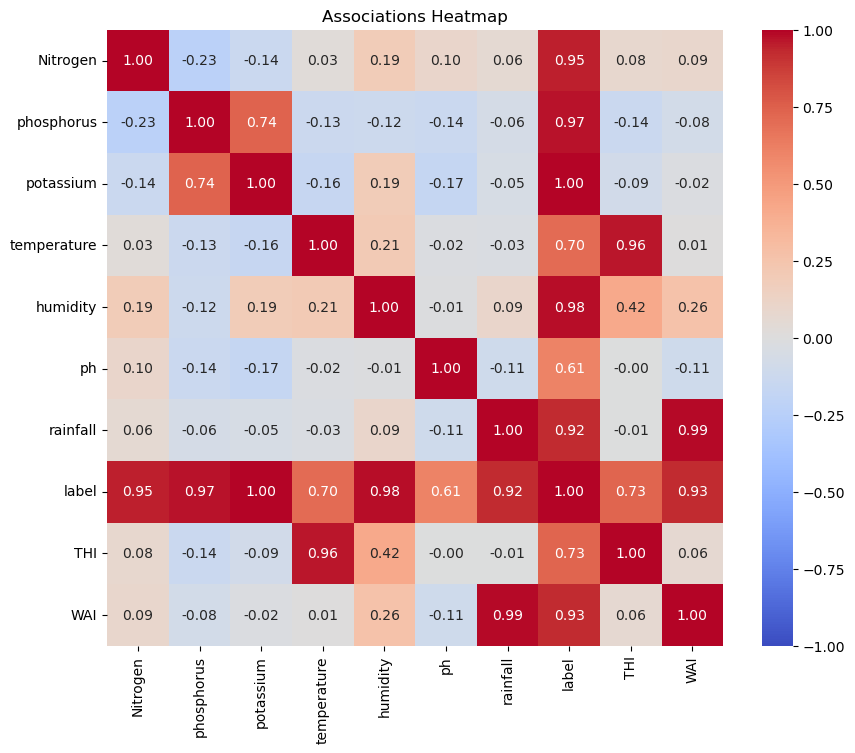

In [34]:
from dython.nominal import associations
assoc_matrix = associations(
    dataset,
    nominal_columns='auto',  # Automatically detect categorical columns
    numerical_columns=None,  # Automatically detect numeric columns
    plot=True,  # Generate a heatmap
    cmap='coolwarm',  # Heatmap color scheme
    title="Associations Heatmap",
    figsize=(10, 8)
)

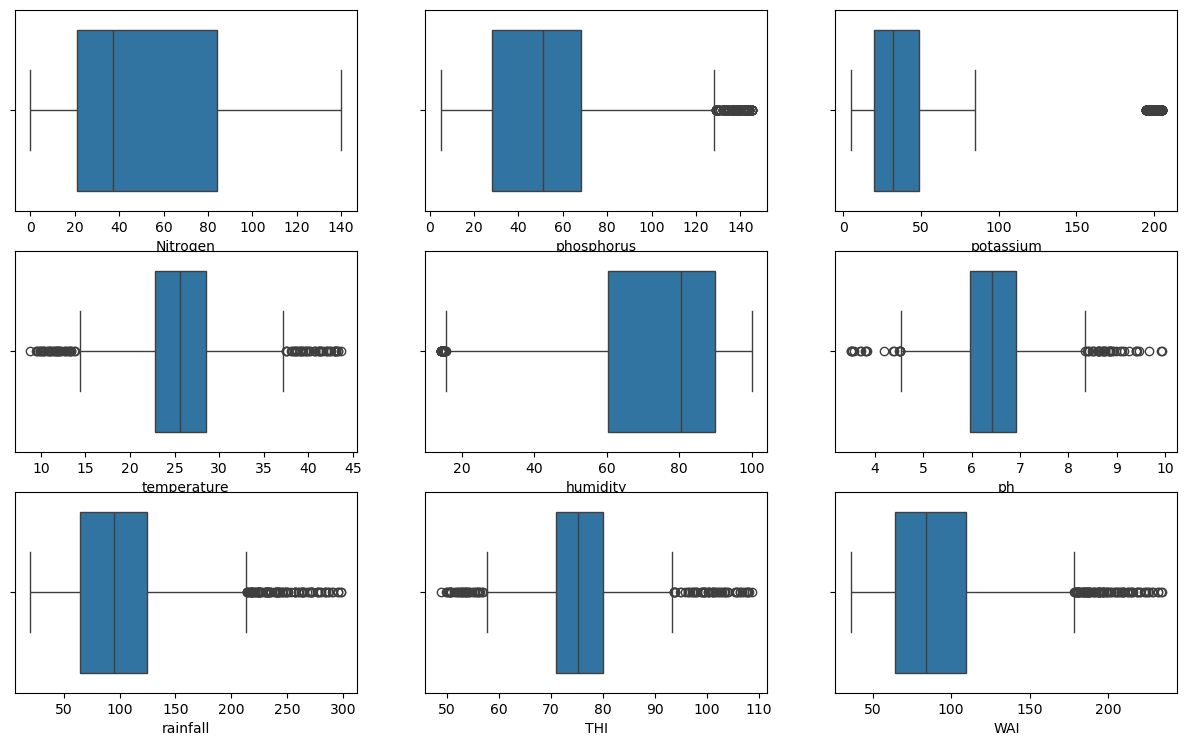

In [35]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(numeric_data.columns, 1):
    plt.subplot(len(numeric_data.columns) // 3 + 1, 3, i)
    sns.boxplot(x=dataset[column])
plt.show()

In [36]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(nfeatures,target)

#training the model
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cr=classification_report(y_test,model.predict(x_test))
print("\n\nClassification report: ",cr,"\n\nAccuracy Score: ",accuracy_score(y_test,model.predict(x_test)))



Classification report:                precision    recall  f1-score   support

       apple       1.00      1.00      1.00        29
      banana       1.00      1.00      1.00        28
   blackgram       0.96      1.00      0.98        27
    chickpea       1.00      1.00      1.00        27
     coconut       0.96      1.00      0.98        26
      coffee       1.00      0.97      0.98        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        25
        jute       0.93      0.70      0.80        20
 kidneybeans       1.00      1.00      1.00        17
      lentil       1.00      0.94      0.97        32
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        28
   mothbeans       0.90      1.00      0.95        18
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        19
 

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9795
Recall: 0.9766
F1 Score: 0.9768


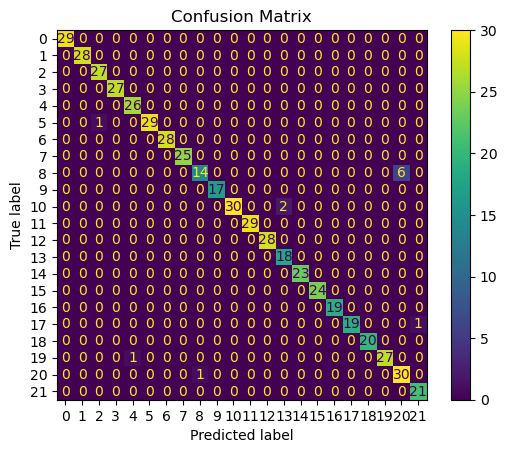

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: Replace y_true and y_pred with your actual and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()